In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import scipy.signal
import glob
import pickle
import cv2
import os

(150, 150)

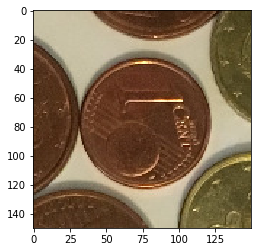

In [6]:
img1 = Image.open('./Inputs/coins/1c/test_1_21.jpg')
plt.imshow(img1)
img1.size

## Pruebas para detectar varias monedas en una imagen 

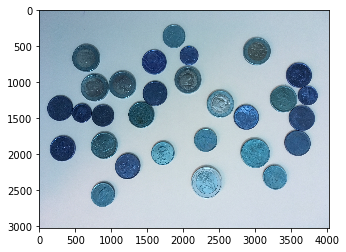

In [12]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2


image = cv2.imread('train_13.jpg')

shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
plt.imshow(image)
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding'''
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY| cv2.THRESH_OTSU)[1]



In [13]:
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 203 unique segments found


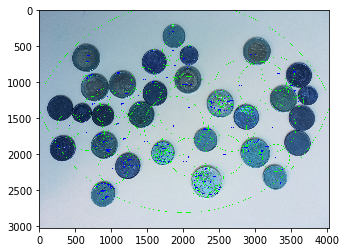

In [14]:
# loop over the unique labels returned by the Watershed
# algorithm
import numpy as np
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    
    mask[labels == label] = 255
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.imshow(image)


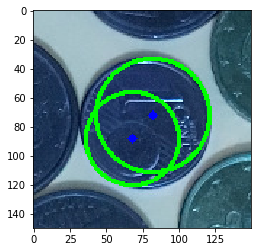

In [43]:
import cv2 
import numpy as np 
  
# Read image. 
img = cv2.imread('./Inputs/coins/1c/test_1_21.jpg', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 5, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        plt.imshow(img) 
        

## Convertimos videos a frames para aumentar el dataset


In [28]:
path = './Inputs/dataset_master/videos_2c/*.jpg'

In [24]:
from src.imgModifier import *

In [41]:
direc = glob.glob('./Inputs/dataset_master/videos_1e/*.mp4')
print(direc)
for video in direc:

    cam = cv2.VideoCapture(video) 
    print(cam)
    try: 
        # creating a folder named data 
        if not os.path.exists('data'): 
            os.makedirs('data') 

    # if not created then raise error 
    except OSError: 
        print ('Error: Creating directory of data') 

    # frame 
    currentframe = 0

    while(True): 
        # reading from frame 
        print('reading image')
        ret,frame = cam.read() 
        
        if ret: 
            # if video is still left continue creating images 
            name = './data/frame' + str(currentframe) + '.jpg'
            print('Creating...' + name) 

            # writing the extracted images 
            cv2.imwrite(name, frame) 

            # increasing counter so that it will 
            # show how many frames are created 
            currentframe += 1
        else: 
            print('Error')
            break

['./Inputs/dataset_master/videos_1e/IMG_9067.mp4']
<VideoCapture 0x137472a70>
reading image
Creating..../data/frame0.jpg
reading image
Creating..../data/frame1.jpg
reading image
Creating..../data/frame2.jpg
reading image
Creating..../data/frame3.jpg
reading image
Creating..../data/frame4.jpg
reading image
Creating..../data/frame5.jpg
reading image
Creating..../data/frame6.jpg
reading image
Creating..../data/frame7.jpg
reading image
Creating..../data/frame8.jpg
reading image
Creating..../data/frame9.jpg
reading image
Creating..../data/frame10.jpg
reading image
Creating..../data/frame11.jpg
reading image
Creating..../data/frame12.jpg
reading image
Creating..../data/frame13.jpg
reading image
Creating..../data/frame14.jpg
reading image
Creating..../data/frame15.jpg
reading image
Creating..../data/frame16.jpg
reading image
Creating..../data/frame17.jpg
reading image
Creating..../data/frame18.jpg
reading image
Creating..../data/frame19.jpg
reading image
Creating..../data/frame20.jpg
reading 

reading image
Creating..../data/frame186.jpg
reading image
Creating..../data/frame187.jpg
reading image
Creating..../data/frame188.jpg
reading image
Creating..../data/frame189.jpg
reading image
Creating..../data/frame190.jpg
reading image
Creating..../data/frame191.jpg
reading image
Creating..../data/frame192.jpg
reading image
Creating..../data/frame193.jpg
reading image
Creating..../data/frame194.jpg
reading image
Creating..../data/frame195.jpg
reading image
Creating..../data/frame196.jpg
reading image
Creating..../data/frame197.jpg
reading image
Creating..../data/frame198.jpg
reading image
Creating..../data/frame199.jpg
reading image
Creating..../data/frame200.jpg
reading image
Creating..../data/frame201.jpg
reading image
Creating..../data/frame202.jpg
reading image
Creating..../data/frame203.jpg
reading image
Creating..../data/frame204.jpg
reading image
Creating..../data/frame205.jpg
reading image
Creating..../data/frame206.jpg
reading image
Creating..../data/frame207.jpg
reading im

reading image
Creating..../data/frame369.jpg
reading image
Creating..../data/frame370.jpg
reading image
Creating..../data/frame371.jpg
reading image
Creating..../data/frame372.jpg
reading image
Creating..../data/frame373.jpg
reading image
Creating..../data/frame374.jpg
reading image
Creating..../data/frame375.jpg
reading image
Creating..../data/frame376.jpg
reading image
Creating..../data/frame377.jpg
reading image
Creating..../data/frame378.jpg
reading image
Creating..../data/frame379.jpg
reading image
Creating..../data/frame380.jpg
reading image
Creating..../data/frame381.jpg
reading image
Creating..../data/frame382.jpg
reading image
Creating..../data/frame383.jpg
reading image
Creating..../data/frame384.jpg
reading image
Creating..../data/frame385.jpg
reading image
Creating..../data/frame386.jpg
reading image
Creating..../data/frame387.jpg
reading image
Creating..../data/frame388.jpg
reading image
Creating..../data/frame389.jpg
reading image
Creating..../data/frame390.jpg
reading im

In [37]:
grados = [e for e in range(15,360,15)]
len(grados)

23